### In this project, we will discuss the ***RNN***, get acquainted with its meaning, how it works, and the difference between the simple rnn and the LSTM.<br>We will also show some examples and discuss how to build the rnn model.  So let's go, we have a lot to talk about ..

> #### ***RNN:*** recurrent neural network is a type of artificial neural network that is best suited to recognizing patterns in sequences of data, like time-series data in our case. An RNN is an extremely powerful algorithm that can classify, cluster, and make predictions about data, particularly time series and text. RNN can be seen as an MLP network with the addition of loops to the architecture; the difference is that the nodes of the hidden layers are interconnected.

> #### ***LSTM:*** Long short-term memory is a modified RNN architecture that tackles the problem of vanishing and exploding gradients and addresses the problem of training over long sequences and retaining memory. All RNNs have feedback loops in the recurrent layer. The feedback loops help keep information in “memory” over time. LSTM is best suited for sequence data. LSTM can predict, classify, and generate sequence data.

> ![](http://www.researchgate.net/publication/341131167/figure/fig1/AS:887489082445828@1588605294853/RNN-v-s-LSTM-a-RNNs-use-their-internal-state-memory-to-process-sequences-of-inputs.jpg)

> ### Now that we know the two important types of the rnn, let's see some examples of this.

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout,SimpleRNN

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Example 1

## Exploratory Data Analysis (EDA)

In [3]:
data1 = pd.read_csv('../input/monthly-sun-spots/monthly-sunspots.csv')
data1.head()

,Month,Sunspots
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0


In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2820 entries, 0 to 2819
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Month     2820 non-null   object 
 1   Sunspots  2820 non-null   float64
dtypes: float64(1), object(1)
memory usage: 44.2+ KB


In [5]:
## converting the 'Month' column from object to date and set it as index

data1['Month'] = pd.to_datetime(data1['Month'])   
data1.set_index('Month', inplace= True)

In [6]:
data1.head()

,Sunspots
Month,
1749-01-01,58.0
1749-02-01,62.6
1749-03-01,70.0
1749-04-01,55.7
1749-05-01,85.0


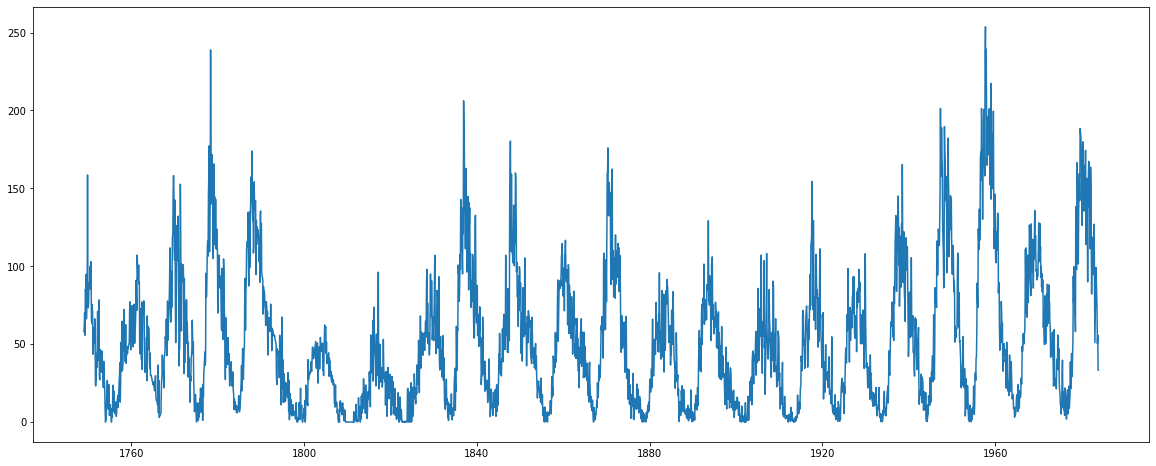

In [7]:
plt.figure(figsize=(20,8))
plt.plot(data1)

In [8]:
## converting the real data to an array

data1=data1.values
data1 = data1.astype('float32')

In [9]:
data1

array([[58. ],
       [62.6],
       [70. ],
       ...,
       [55.8],
       [33.3],
       [33.4]], dtype=float32)

### Scale The data and Split it into a train/test

In [10]:
scaler= MinMaxScaler(feature_range=(-1,1))
sc = scaler.fit_transform(data1)

In [11]:
len(data1)

2820

In [12]:
test_precent=0.05

In [13]:
test_precent*len(data1)

141.0

In [14]:
test_point=np.round(len(data1)*test_precent)
test_point

141.0

In [15]:
test_indx=int(len(data1)-test_point)
test_indx

2679

In [16]:
timestep = 30

X= []
Y=[]


for i in range(len(sc)- (timestep)):
    X.append(sc[i:i+timestep])
    Y.append(sc[i+timestep])


X=np.asanyarray(X)
Y=np.asanyarray(Y)


Xtrain = X[:test_indx,:,:]
Xtest = X[test_indx:,:,:]    
Ytrain = Y[:test_indx]    
Ytest= Y[test_indx:]   

In [17]:
print(Xtrain.shape)
print(Xtest.shape)

(2679, 30, 1)
(111, 30, 1)


## Time Series Forecast using LSTM

### build the model

In [18]:
model = Sequential()

model.add(LSTM(32,activation = 'relu', input_shape= (30,1), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=True))
model.add(LSTM(32, activation='sigmoid', return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

2022-09-24 14:23:48.540050: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-24 14:23:48.647562: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-24 14:23:48.648454: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-24 14:23:48.650585: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 32)            4352      
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 32)            8320      
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 21,025
Trainable params: 21,025
Non-trainable params: 0
_________________________________________________________________


### fit the model

In [20]:
model.fit(Xtrain,Ytrain,epochs=50, verbose=1)

2022-09-24 14:23:51.921009: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
84/84 [==============================] - 17s 156ms/step - loss: 0.5035
Epoch 2/50
84/84 [==============================] - 14s 161ms/step - loss: 0.0553
Epoch 3/50
84/84 [==============================] - 13s 160ms/step - loss: 0.0243
Epoch 4/50
84/84 [==============================] - 14s 167ms/step - loss: 0.0216
Epoch 5/50
84/84 [==============================] - 13s 158ms/step - loss: 0.0201
Epoch 6/50
84/84 [==============================] - 14s 164ms/step - loss: 0.0190
Epoch 7/50
84/84 [==============================] - 13s 157ms/step - loss: 0.0187
Epoch 8/50
84/84 [==============================] - 13s 158ms/step - loss: 0.0185
Epoch 9/50
84/84 [==============================] - 14s 161ms/step - loss: 0.0188
Epoch 10/50
84/84 [==============================] - 13s 154ms/step - loss: 0.0180
Epoch 11/50
84/84 [==============================] - 14s 164ms/step - loss: 0.0181
Epoch 12/50
84/84 [==============================] - 13s 158ms/step - loss: 0.0173
Epoch 13/50
8

In [21]:
losses=pd.DataFrame(model.history.history)
losses.head()

,loss
0,0.503485
1,0.055296
2,0.024268
3,0.021595
4,0.020063


<AxesSubplot:>

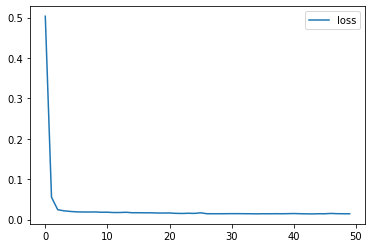

In [22]:
losses.plot()

In [23]:
preds= model.predict(Xtest)
preds = scaler.inverse_transform(preds)


Ytest=np.asanyarray(Ytest)  
Ytest=Ytest.reshape(-1,1) 
Ytest = scaler.inverse_transform(Ytest)


Ytrain=np.asanyarray(Ytrain)  
Ytrain=Ytrain.reshape(-1,1) 
Ytrain = scaler.inverse_transform(Ytrain)

mean_squared_error(Ytest,preds)

387.1146

### show the result

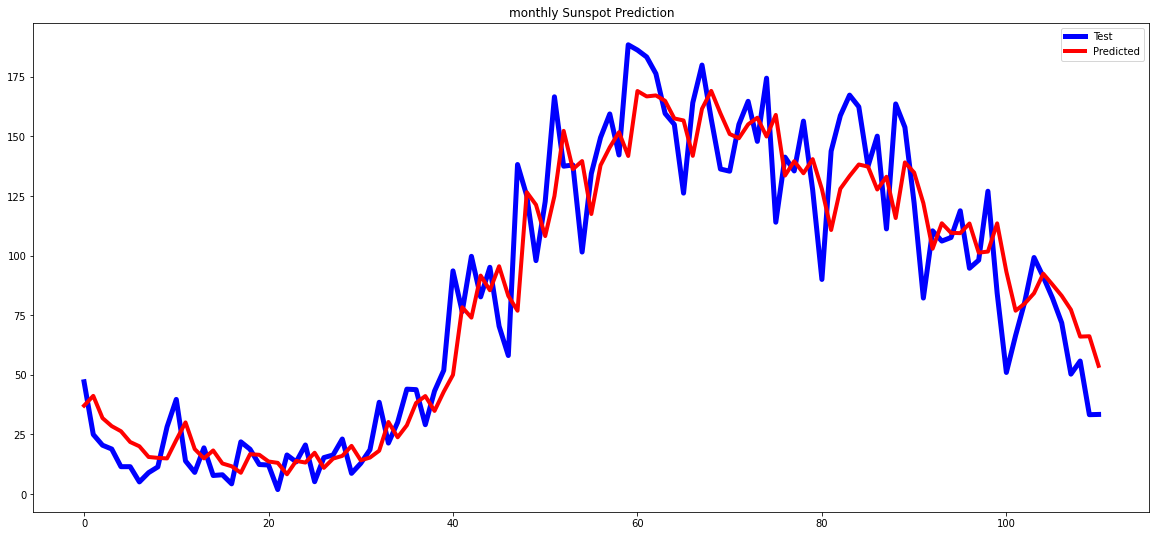

In [24]:
plt.figure(figsize=(20,9))
plt.plot(Ytest , 'blue', linewidth=5)
plt.plot(preds,'r' , linewidth=4)
plt.legend(('Test','Predicted'))
plt.title("monthly Sunspot Prediction")
plt.show()

## Time Series Forecast using Simple RNN

### build the model

In [25]:
model=Sequential()

model.add(SimpleRNN(32,activation = 'relu', input_shape= (30,1)))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

### fit the model

In [26]:
model.fit(Xtrain,Ytrain,epochs=50, verbose=1)

Epoch 1/50
84/84 [==============================] - 3s 20ms/step - loss: 3097.8501
Epoch 2/50
84/84 [==============================] - 2s 19ms/step - loss: 1391.1638
Epoch 3/50
84/84 [==============================] - 2s 22ms/step - loss: 1262.1921
Epoch 4/50
84/84 [==============================] - 2s 20ms/step - loss: 956.0196
Epoch 5/50
84/84 [==============================] - 2s 20ms/step - loss: 893.9860
Epoch 6/50
84/84 [==============================] - 2s 20ms/step - loss: 790.8998
Epoch 7/50
84/84 [==============================] - 2s 24ms/step - loss: 827.7901
Epoch 8/50
84/84 [==============================] - 2s 21ms/step - loss: 735.8933
Epoch 9/50
84/84 [==============================] - 2s 21ms/step - loss: 657.5120
Epoch 10/50
84/84 [==============================] - 2s 20ms/step - loss: 648.7188
Epoch 11/50
84/84 [==============================] - 2s 21ms/step - loss: 588.8516
Epoch 12/50
84/84 [==============================] - 2s 20ms/step - loss: 546.2662
Epoch 13/5

In [27]:
losses=pd.DataFrame(model.history.history)
losses.head()

,loss
0,3097.850098
1,1391.163818
2,1262.192139
3,956.019592
4,893.986023


<AxesSubplot:>

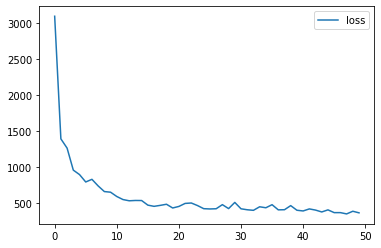

In [28]:
losses.plot()

In [29]:
preds= model.predict(Xtest)
preds = scaler.inverse_transform(preds)


Ytest=np.asanyarray(Ytest)  
Ytest=Ytest.reshape(-1,1) 
Ytest = scaler.inverse_transform(Ytest)


Ytrain=np.asanyarray(Ytrain)  
Ytrain=Ytrain.reshape(-1,1) 
Ytrain = scaler.inverse_transform(Ytrain)

mean_squared_error(Ytest,preds)

15261093.0

### show the result

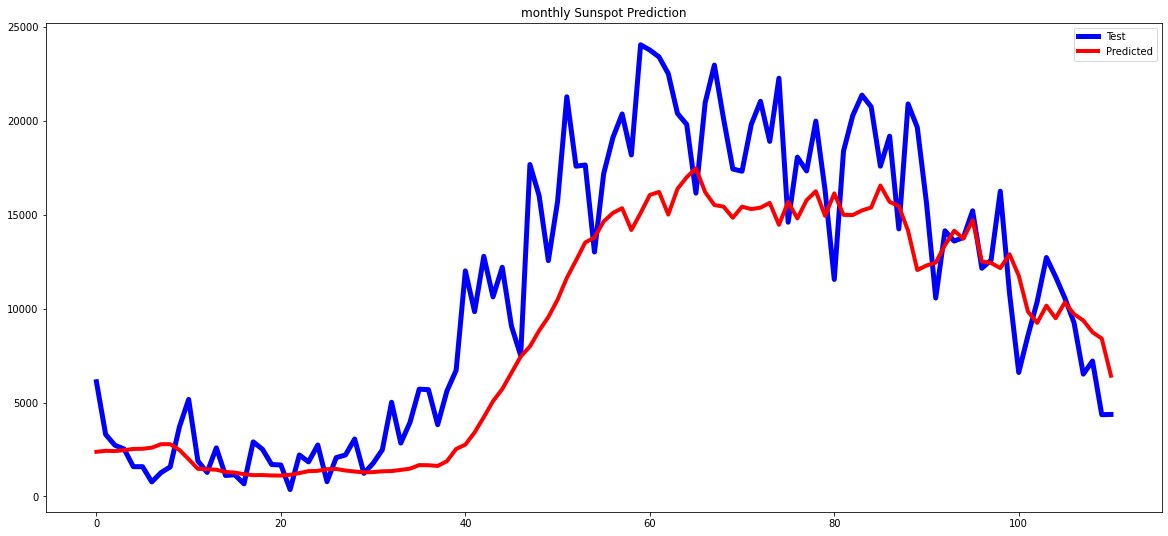

In [30]:
plt.figure(figsize=(20,9))
plt.plot(Ytest , 'blue', linewidth=5)
plt.plot(preds,'r' , linewidth=4)
plt.legend(('Test','Predicted'))
plt.title("monthly Sunspot Prediction")
plt.show()

# Example 2

## Exploratory Data Analysis (EDA)

In [31]:
data2 = pd.read_csv("../input/frozen-dessert-data/IPN31152N.csv")
data2.head()

,DATE,IPN31152N
0,1972-01-01,60.1527
1,1972-02-01,67.2736
2,1972-03-01,74.4710
3,1972-04-01,78.3605
4,1972-05-01,85.0332


In [32]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DATE       598 non-null    object 
 1   IPN31152N  598 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.5+ KB


In [33]:
## converting the 'Date' column from object to date and set it as index

data2['DATE'] = pd.to_datetime(data2['DATE'])
data2.set_index('DATE', inplace= True)

In [34]:
data2.head()

,IPN31152N
DATE,
1972-01-01,60.1527
1972-02-01,67.2736
1972-03-01,74.4710
1972-04-01,78.3605
1972-05-01,85.0332


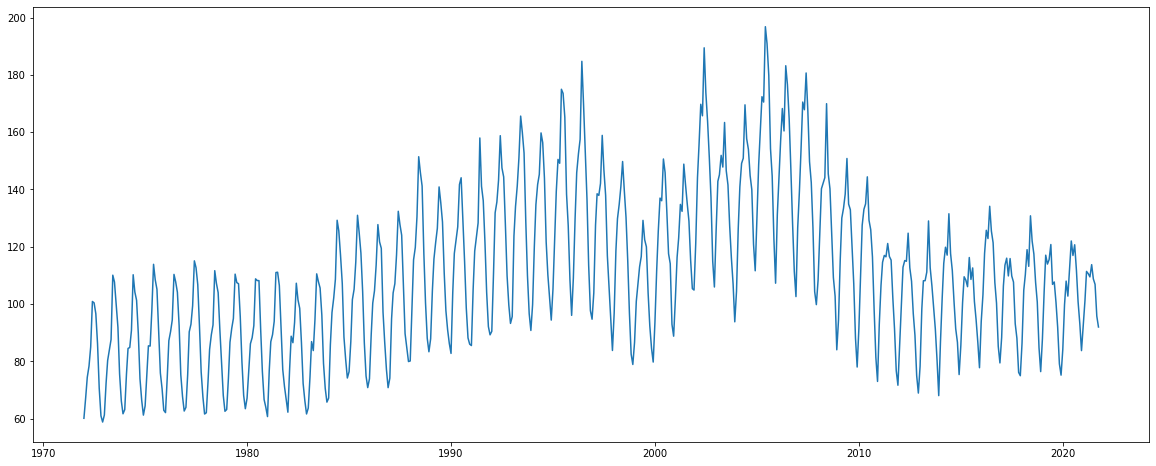

In [35]:
plt.figure(figsize=(20,8))
plt.plot(data2)

In [36]:
## converting the real data to an array

data2=data2.values
data2 = data2.astype('float32')

### Scale The data and Split it into a train/test

In [37]:
scaler= MinMaxScaler(feature_range=(-1,1))
sc = scaler.fit_transform(data2)

In [38]:
len(sc)

598

In [39]:
len(data2)

598

In [40]:
test_precent=0.05

In [41]:
test_precent*len(data2)

29.900000000000002

In [42]:
test_point=np.round(len(data2)*test_precent)
test_point

30.0

In [43]:
test_indx=int(len(data2)-test_point)
test_indx

568

In [44]:
## time step changes according to the size of the data

timestep = 10

X= []
Y=[]


for i in range(len(sc)- (timestep)):
    X.append(sc[i:i+timestep])
    Y.append(sc[i+timestep])


X=np.asanyarray(X)
Y=np.asanyarray(Y)


Xtrain = X[:test_indx,:,:]
Xtest = X[test_indx:,:,:]    
Ytrain = Y[:test_indx]    
Ytest= Y[test_indx:]   

In [45]:
print(Xtrain.shape)
print(Xtest.shape)

(568, 10, 1)
(20, 10, 1)


## Time Series Forecast using LSTM

### build the model

In [46]:
model = Sequential()

model.add(LSTM(32,activation = 'relu', input_shape= (10,1), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=True))
model.add(LSTM(32, activation='sigmoid', return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [47]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 10, 32)            4352      
_________________________________________________________________
lstm_4 (LSTM)                (None, 10, 32)            8320      
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 21,025
Trainable params: 21,025
Non-trainable params: 0
_________________________________________________________________


### fit the model

In [48]:
model.fit(Xtrain,Ytrain,epochs=50, verbose=1)

Epoch 1/50
18/18 [==============================] - 4s 58ms/step - loss: 0.3022
Epoch 2/50
18/18 [==============================] - 1s 57ms/step - loss: 0.1666
Epoch 3/50
18/18 [==============================] - 1s 64ms/step - loss: 0.1478
Epoch 4/50
18/18 [==============================] - 2s 102ms/step - loss: 0.1344
Epoch 5/50
18/18 [==============================] - 1s 58ms/step - loss: 0.1265
Epoch 6/50
18/18 [==============================] - 1s 56ms/step - loss: 0.1217
Epoch 7/50
18/18 [==============================] - 1s 56ms/step - loss: 0.1166
Epoch 8/50
18/18 [==============================] - 1s 57ms/step - loss: 0.1097
Epoch 9/50
18/18 [==============================] - 1s 64ms/step - loss: 0.0998
Epoch 10/50
18/18 [==============================] - 1s 59ms/step - loss: 0.0877
Epoch 11/50
18/18 [==============================] - 1s 58ms/step - loss: 0.0694
Epoch 12/50
18/18 [==============================] - 1s 57ms/step - loss: 0.0484
Epoch 13/50
18/18 [=================

In [49]:
losses=pd.DataFrame(model.history.history)
losses.head()

,loss
0,0.302155
1,0.166591
2,0.147764
3,0.134435
4,0.126480


<AxesSubplot:>

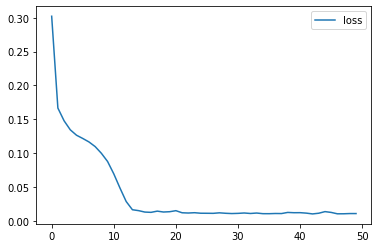

In [50]:
losses.plot()

In [51]:
preds= model.predict(Xtest)
preds = scaler.inverse_transform(preds)


Ytest=np.asanyarray(Ytest)  
Ytest=Ytest.reshape(-1,1) 
Ytest = scaler.inverse_transform(Ytest)


Ytrain=np.asanyarray(Ytrain)  
Ytrain=Ytrain.reshape(-1,1) 
Ytrain = scaler.inverse_transform(Ytrain)

mean_squared_error(Ytest,preds)

36.497723

### show the result

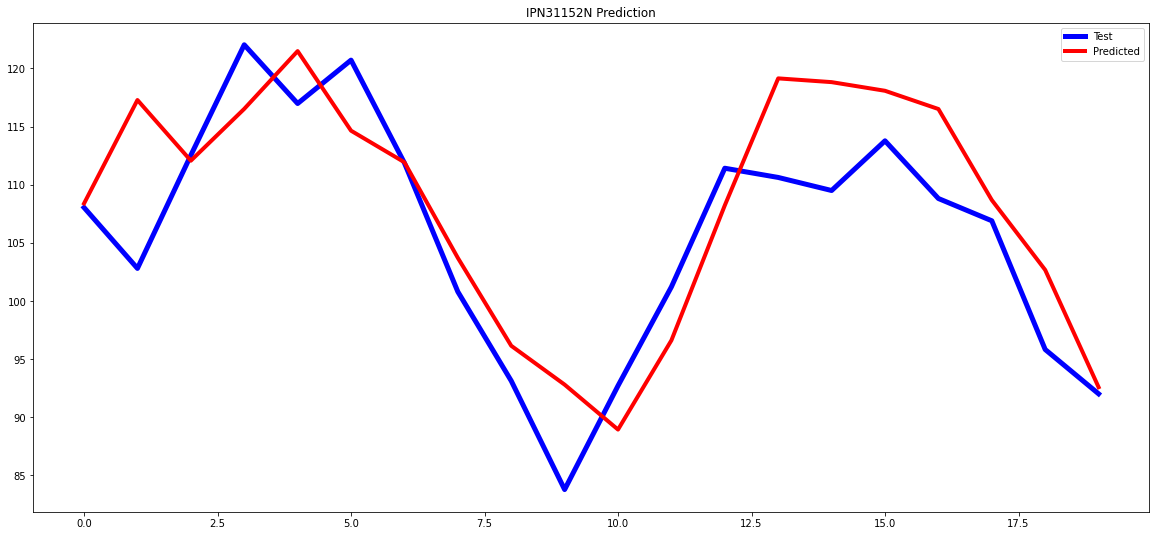

In [52]:
plt.figure(figsize=(20,9))
plt.plot(Ytest , 'blue', linewidth=5)
plt.plot(preds,'r' , linewidth=4)
plt.legend(('Test','Predicted'))
plt.title("IPN31152N Prediction")
plt.show()

# Example 3

## Exploratory Data Analysis (EDA)

In [53]:
data3 = pd.read_csv("../input/daily-min-temperatures/daily-min-temperatures.csv")
data3.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [54]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3650 non-null   object 
 1   Temp    3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


In [55]:
## converting the 'Month' column from object to date and set it as index

data3['Date'] = pd.to_datetime(data3['Date'])
data3.set_index('Date', inplace= True)

In [56]:
data3.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


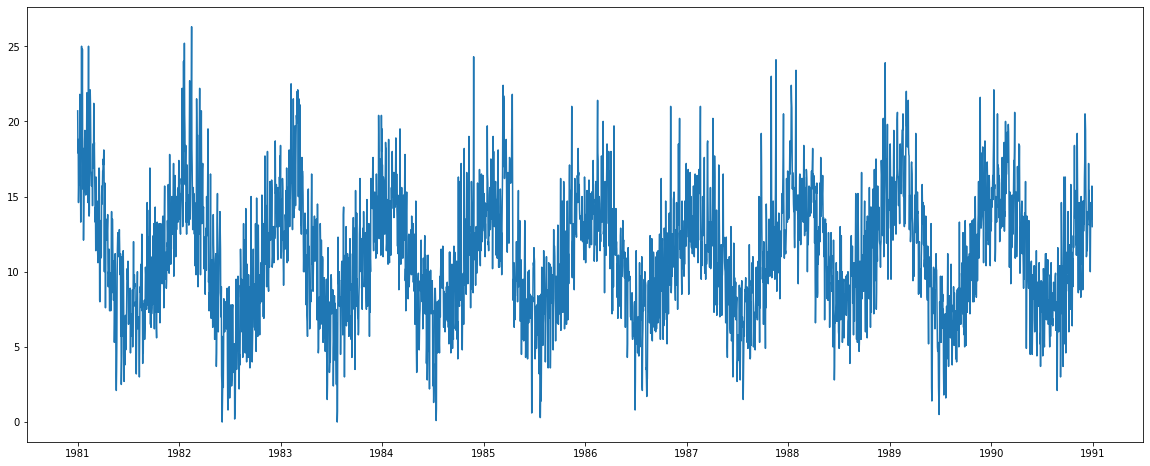

In [57]:
plt.figure(figsize=(20,8))
plt.plot(data3)

In [58]:
## converting the real data to an array

data3=data3.values
data3 = data3.astype('float32')

In [59]:
data3

array([[20.7],
       [17.9],
       [18.8],
       ...,
       [13.5],
       [15.7],
       [13. ]], dtype=float32)

### Scale The data and Split it into a train/test

In [60]:
scaler= MinMaxScaler(feature_range=(-1,1))
sc = scaler.fit_transform(data3)

In [61]:
len(sc)

3650

In [62]:
len(data3)

3650

In [63]:
test_precent=0.05

In [64]:
test_precent*len(data3)

182.5

In [65]:
test_point=np.round(len(data3)*test_precent)
test_point

182.0

In [66]:
test_indx=int(len(data3)-test_point)
test_indx

3468

In [67]:
## time step changes according to the size of the data

timestep = 30

X= []
Y=[]


for i in range(len(sc)- (timestep)):
    X.append(sc[i:i+timestep])
    Y.append(sc[i+timestep])


X=np.asanyarray(X)
Y=np.asanyarray(Y)


Xtrain = X[:test_indx,:,:]
Xtest = X[test_indx:,:,:]    
Ytrain = Y[:test_indx]    
Ytest= Y[test_indx:]   

In [68]:
print(Xtrain.shape)
print(Xtest.shape)

(3468, 30, 1)
(152, 30, 1)


## Time Series Forecast using LSTM

### build the model

In [69]:
model = Sequential()

model.add(LSTM(32,activation = 'relu', input_shape= (30,1), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=True))
model.add(LSTM(32, activation='sigmoid', return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [70]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 30, 32)            4352      
_________________________________________________________________
lstm_7 (LSTM)                (None, 30, 32)            8320      
_________________________________________________________________
lstm_8 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 21,025
Trainable params: 21,025
Non-trainable params: 0
_________________________________________________________________


### fit the model

In [71]:
model.fit(Xtrain,Ytrain,epochs=50, verbose=1)

Epoch 1/50
109/109 [==============================] - 20s 165ms/step - loss: 0.0684
Epoch 2/50
109/109 [==============================] - 17s 157ms/step - loss: 0.0467
Epoch 3/50
109/109 [==============================] - 18s 162ms/step - loss: 0.0456
Epoch 4/50
109/109 [==============================] - 17s 159ms/step - loss: 0.0441
Epoch 5/50
109/109 [==============================] - 18s 162ms/step - loss: 0.0437
Epoch 6/50
109/109 [==============================] - 17s 157ms/step - loss: 0.0410
Epoch 7/50
109/109 [==============================] - 18s 166ms/step - loss: 0.0358
Epoch 8/50
109/109 [==============================] - 18s 162ms/step - loss: 0.0352
Epoch 9/50
109/109 [==============================] - 17s 158ms/step - loss: 0.0348
Epoch 10/50
109/109 [==============================] - 18s 162ms/step - loss: 0.0341
Epoch 11/50
109/109 [==============================] - 17s 159ms/step - loss: 0.0339
Epoch 12/50
109/109 [==============================] - 17s 161ms/step - lo

In [72]:
losses=pd.DataFrame(model.history.history)
losses.head()

,loss
0,0.068361
1,0.046749
2,0.045644
3,0.044107
4,0.043742


<AxesSubplot:>

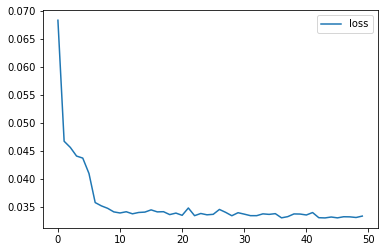

In [73]:
losses.plot()

In [74]:
preds= model.predict(Xtest)
preds = scaler.inverse_transform(preds)


Ytest=np.asanyarray(Ytest)  
Ytest=Ytest.reshape(-1,1) 
Ytest = scaler.inverse_transform(Ytest)


Ytrain=np.asanyarray(Ytrain)  
Ytrain=Ytrain.reshape(-1,1) 
Ytrain = scaler.inverse_transform(Ytrain)

mean_squared_error(Ytest,preds)

6.1318626

### show the result

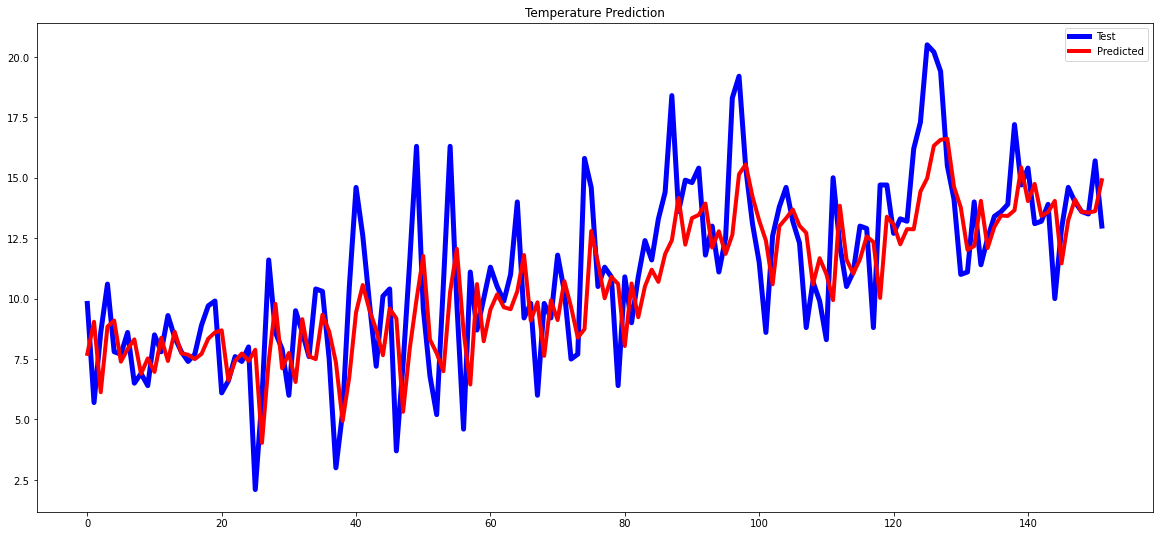

In [75]:
plt.figure(figsize=(20,9))
plt.plot(Ytest , 'blue', linewidth=5)
plt.plot(preds,'r' , linewidth=4)
plt.legend(('Test','Predicted'))
plt.title("Temperature Prediction")
plt.show()

## Time Series Forecast using Simple RNN

### build the model

In [76]:
model=Sequential()

model.add(SimpleRNN(32,activation = 'relu', input_shape= (30,1)))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

### fit the model

In [77]:
model.fit(Xtrain,Ytrain,epochs=50, verbose=1)

Epoch 1/50
109/109 [==============================] - 3s 24ms/step - loss: 68.7607
Epoch 2/50
109/109 [==============================] - 2s 20ms/step - loss: 9.3745
Epoch 3/50
109/109 [==============================] - 2s 20ms/step - loss: 8.8556
Epoch 4/50
109/109 [==============================] - 2s 20ms/step - loss: 8.3876
Epoch 5/50
109/109 [==============================] - 2s 21ms/step - loss: 8.1381
Epoch 6/50
109/109 [==============================] - 2s 23ms/step - loss: 8.6118
Epoch 7/50
109/109 [==============================] - 2s 21ms/step - loss: 8.1774
Epoch 8/50
109/109 [==============================] - 2s 21ms/step - loss: 7.9671
Epoch 9/50
109/109 [==============================] - 2s 20ms/step - loss: 8.1886
Epoch 10/50
109/109 [==============================] - 2s 21ms/step - loss: 8.2936
Epoch 11/50
109/109 [==============================] - 3s 24ms/step - loss: 8.0244
Epoch 12/50
109/109 [==============================] - 2s 21ms/step - loss: 7.7605
Epoch 13/50


In [78]:
losses=pd.DataFrame(model.history.history)
losses.head()

,loss
0,68.760735
1,9.374456
2,8.855566
3,8.387597
4,8.138141


<AxesSubplot:>

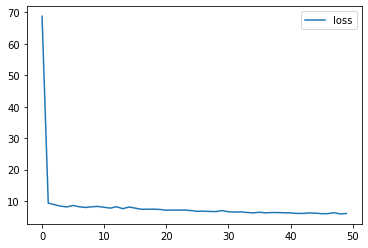

In [79]:
losses.plot()

In [80]:
preds= model.predict(Xtest)
preds = scaler.inverse_transform(preds)


Ytest=np.asanyarray(Ytest)  
Ytest=Ytest.reshape(-1,1) 
Ytest = scaler.inverse_transform(Ytest)


Ytrain=np.asanyarray(Ytrain)  
Ytrain=Ytrain.reshape(-1,1) 
Ytrain = scaler.inverse_transform(Ytrain)

mean_squared_error(Ytest,preds)

1042.7443

### show the result

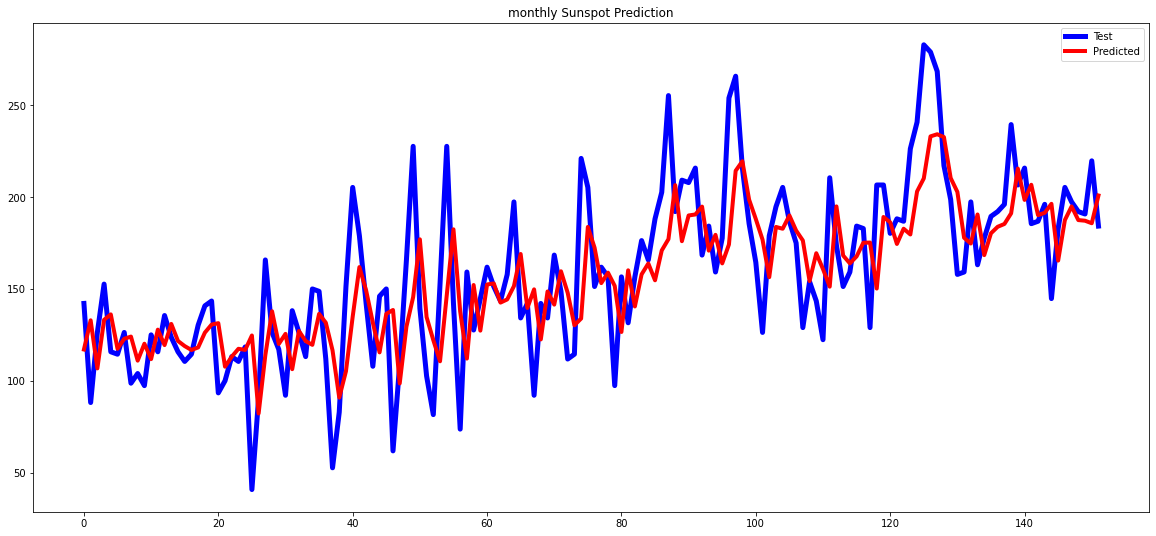

In [81]:
plt.figure(figsize=(20,9))
plt.plot(Ytest , 'blue', linewidth=5)
plt.plot(preds,'r' , linewidth=4)
plt.legend(('Test','Predicted'))
plt.title("monthly Sunspot Prediction")
plt.show()